# Kaggle - Titanic

## Import Functions

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from titanic import *

## Import Data

**Import: `train` data**

In [2]:
filename = 'data/train.csv'
df_train = import_data(filename)
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Import: `test` data**

In [3]:
filename = 'data/test.csv'
df_test = import_data(filename)
df_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


**Concatedate `train` and `test` dataframes**

In [4]:
df = concatenate_dataframes(df_train, df_test)

## Feature Creation

In [5]:
df = create_features(df)

In [6]:
df.head(3)

,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,Title,Survival_by_title,granular_grouped_title,title_class,Age
0,0.0,3,"Braund, Mr. Owen Harris",male,1,0,NaN,S,Mr,low,mr,mr_3,22.0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C85,C,Mrs,high,mrs_ms_lady,mrs_ms_lady_1,38.0
2,1.0,3,"Heikkinen, Miss. Laina",female,0,0,NaN,S,Miss,high,miss,miss_3,26.0


In [7]:
df.tail(3)

,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,Title,Survival_by_title,granular_grouped_title,title_class,Age
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,NaN,S,Mr,low,mr,mr_3,38.500000
1307,NaN,3,"Ware, Mr. Frederick",male,0,0,NaN,S,Mr,low,mr,mr_3,25.962264
1308,NaN,3,"Peter, Master. Michael J",male,1,1,NaN,C,Master,high,master,master_3,25.962264


## [EDA] `Survival rate` by `Title`

In [8]:
variable = 'title_class'
# variable = 'Parch'
flag = df['Survived'].isnull()
x = df[~flag].groupby(by=[variable]).agg({'Survived':['sum', 'count']})
x = x.droplevel(level=0, axis=1)
x['Ratio'] = x['sum']/x['count']
x

,sum,count,Ratio
title_class,,,
don_donna,0.0,1,0.000000
dr,3.0,7,0.428571
master_1,3.0,3,1.000000
master_2,9.0,9,1.000000
master_3,11.0,28,0.392857
military,2.0,5,0.400000
miss_1,44.0,46,0.956522
miss_2,32.0,34,0.941176
miss_3,51.0,102,0.500000


In [9]:
x = df[flag].groupby(by=[variable]).agg({variable:['count']})
x = x.droplevel(level=0, axis=1)
x

,count
title_class,
don_donna,1
dr,1
master_1,2
master_2,2
master_3,17
military,2
miss_1,14
miss_2,16
miss_3,48


## Feature Engineering

### Select Features

In [10]:
features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Title', 'title_class']
# features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'title_class']
# features = ['Survived', 'SibSp', 'Parch', 'Pclass', 'title_class']
# features = ['Survived', 'title_class']
df = select_features(df, features)

In [11]:
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Title,title_class
0,0.0,3,male,1,0,Mr,mr_3
1,1.0,1,female,1,0,Mrs,mrs_ms_lady_1
2,1.0,3,female,0,0,Miss,miss_3


### Transform categorical variables in dummies

In [12]:
categorical_variables = ['Pclass', 'Sex', 'Title', 'title_class']
# categorical_variables = ['Pclass', 'Sex', 'title_class']
# categorical_variables = ['title_class']
df = convert_categorical(df, categorical_variables)

In [13]:
df.head(3)

,Survived,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Title_ Col,Title_ Don,Title_ Dona,Title_ Dr,...,title_class_miss_3,title_class_mme_mlle,title_class_mr_1,title_class_mr_2,title_class_mr_3,title_class_mrs_ms_lady_1,title_class_mrs_ms_lady_2,title_class_mrs_ms_lady_3,title_class_noble,title_class_rev
0,0.0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Extract `X` and `y` from `train` and `test`

In [14]:
flag = df['Survived'].isnull()
X_train, y_train = extract_X_y(df[~flag])
X_test, y_test = extract_X_y(df[flag])

## Model: Hyperparameter Optimization

### Logistic Regression

In [15]:
model_type = 'LogisticRegression'
gridsearch_lr = train_model(model_type, X_train, y_train)
df = predict(gridsearch_lr, X_test, df, column='LR')
search = gridsearch_output(gridsearch_lr)
search

,params,mean_test_score,std_test_score
0,{'C': 0.5},0.827146,0.050092
1,{'C': 1},0.826061,0.048422
2,{'C': 0.3},0.822576,0.051805
3,{'C': 3},0.820455,0.051138
4,{'C': 0.1},0.800076,0.043646


### Decision Tree Classifier

In [16]:
model_type = 'DecisionTreeClassifier'
gridsearch_dtc = train_model(model_type, X_train, y_train)
df = predict(gridsearch_dtc, X_test, df, column='DTC')
search = gridsearch_output(gridsearch_dtc)
search

,params,mean_test_score,std_test_score
0,{'max_depth': 5},0.823737,0.057784
1,{'max_depth': 7},0.819343,0.048050
2,{'max_depth': 4},0.811288,0.050309
3,{'max_depth': 8},0.808106,0.052191
4,{'max_depth': 6},0.808081,0.049323
5,{'max_depth': 3},0.807929,0.045575
6,{'max_depth': 9},0.806944,0.050375
7,{'max_depth': 10},0.805833,0.048728


### K Neighbors Classifier

In [17]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
model_type = 'KNeighborsClassifier'
gridsearch_knn = train_model(model_type, X_train, y_train)
df = predict(gridsearch_knn, X_test, df, column='KNN')
search = gridsearch_output(gridsearch_knn)
search

,params,mean_test_score,std_test_score
0,{'n_neighbors': 30},0.822601,0.048592
1,{'n_neighbors': 25},0.820404,0.052393
2,{'n_neighbors': 40},0.818081,0.052162
3,{'n_neighbors': 50},0.806843,0.047505


### SVC

In [19]:
model_type = 'SVC'
gridsearch_svc = train_model(model_type, X_train, y_train)
df = predict(gridsearch_svc, X_test, df, column='SVC')
search = gridsearch_output(gridsearch_svc)
search

,params,mean_test_score,std_test_score
0,{'C': 0.1},0.827096,0.052700
1,{'C': 1},0.820303,0.055216
2,{'C': 10},0.817020,0.051958
3,{'C': 0.001},0.616136,0.006747
4,{'C': 0.01},0.616136,0.006747


## Model Selection

### Create models with optimal hyperparameter

In [20]:
lr = LogisticRegression(C=gridsearch_lr.best_params_['C'], penalty='l1', solver='liblinear')
dtc = DecisionTreeClassifier(max_depth=gridsearch_dtc.best_params_['max_depth'])
knn = KNeighborsClassifier(n_neighbors=gridsearch_knn.best_params_['n_neighbors'])
svc = SVC(C=gridsearch_svc.best_params_['C'])

### Check optimal model by Stratified KFold

In [21]:
n_splits = 20
optimal_kfold = pd.DataFrame(columns=['model', 'accuracy'])
accuracy_df = pd.DataFrame(index=['Logistic', 'DTC', 'KNN', 'SVC'], columns=['accuracy'])

In [22]:
kf = StratifiedKFold(n_splits=n_splits)
i = 0
for train_index, test_index in kf.split(X_train, y_train):
    
    XX_train, XX_test = X_train.iloc[train_index], X_train.iloc[test_index]
    yy_train, yy_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Logistic
    accuracy_df['accuracy']['Logistic'] = fit_predict_score(lr, XX_train, XX_test, yy_train, yy_test)
    
    # DTC
    accuracy_df['accuracy']['DTC'] = fit_predict_score(dtc, XX_train, XX_test, yy_train, yy_test)
    
    # KNN
    accuracy_df['accuracy']['KNN'] = fit_predict_score(knn, XX_train, XX_test, yy_train, yy_test)
    
    # SVC
    accuracy_df['accuracy']['SVC'] = fit_predict_score(svc, XX_train, XX_test, yy_train, yy_test)
    
    best_score = accuracy_df['accuracy'].max()
    best_model = accuracy_df[accuracy_df['accuracy'] == best_score].index[0]
    
    optimal_kfold.loc[i] = [best_model]+[best_score]
    i+=1

### Check Results

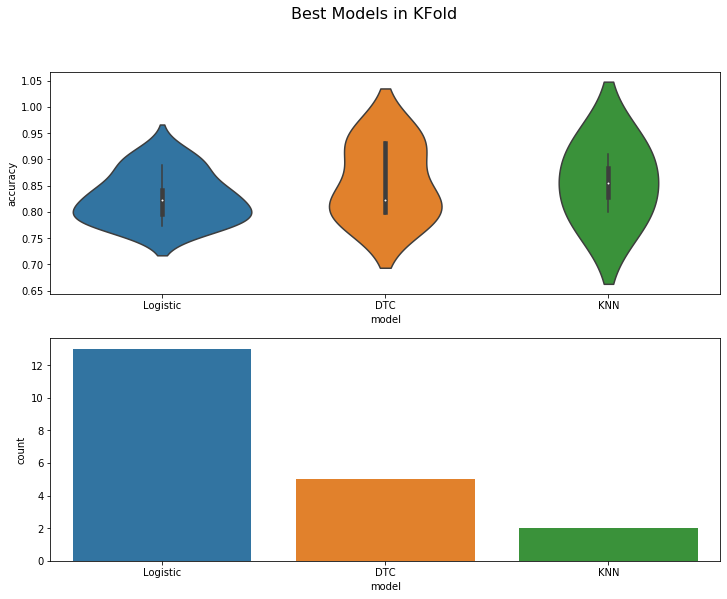

In [23]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))
sns.violinplot(x='model', y='accuracy', data=optimal_kfold, ax=ax1)
sns.countplot(optimal_kfold['model'])
plt.suptitle('Best Models in KFold', fontsize=16)
plt.show()

## Predict Evaluation Set

### Run chosen model with optimal hyperparameter and full training set

In [24]:
model = lr
model.fit(X_train, y_train)
indexes = X_test.index
df_test['Survived'] = np.nan
df_test['Survived'] = model.predict(X_test)

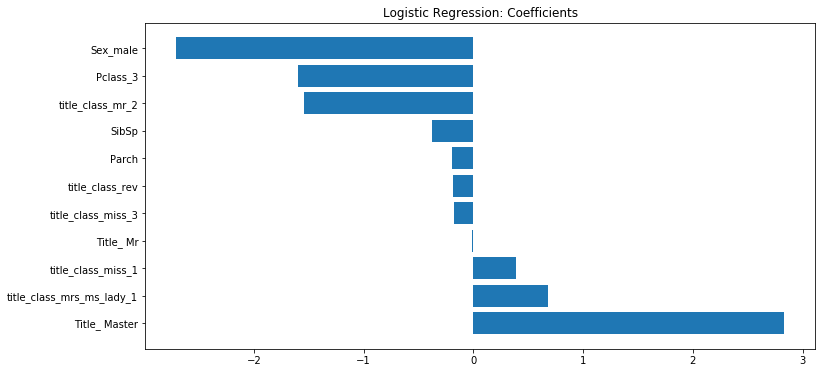

In [25]:
coefs = pd.DataFrame(lr.coef_.T, index=X_train.columns)
coefs.sort_values(0, ascending=False, inplace=True)
flags = abs(coefs[0])>0
plt.figure(figsize=(12, 6))
plt.barh(y=coefs[flags].index, width=coefs[flags][0])
plt.title('Logistic Regression: Coefficients')
plt.show()

### Export to csv

In [26]:
filename = 'output/lr_opt5.csv'
df_test['Survived'] = df_test['Survived'].astype('int')
df_test[['Survived']].to_csv(filename)